In [1]:
import numpy as np
import pandas as pd
import pickle
import sys
sys.path.append("..")
sys.path.append("../d2c/")
# Generating random dat+a for the test
np.random.seed(42)  # Seed for reproducibility
from utils import print_dag, dag_to_formula, show_dag, make_name, mRMR
from d2c import D2C



In [2]:
import numpy as np
import pandas as pd
from datetime import datetime
from sklearn.feature_selection import mutual_info_regression

# mRMR function defined here...

# Generate synthetic dataset
np.random.seed(42)  # For reproducibility

n_samples = 500
n_relevant_features = 5
n_noise_features = 10

# Generate a target
Y = np.random.randn(n_samples)

# Generate relevant features based on Y
relevant_features = [Y + np.random.normal(0, 0.1, n_samples) for _ in range(n_relevant_features)]
relevant_features = np.array(relevant_features).T

# Generate noise features that are just random values
noise_features = np.random.randn(n_samples, n_noise_features)

# Combine into one feature matrix
X = np.hstack([noise_features, relevant_features])
X = pd.DataFrame(X)

# Test the function
selected_indices = mRMR(X, Y, nmax=n_relevant_features)

print("Selected feature indices:", selected_indices)


Selected feature indices: [13, 12, 10, 11, 14]


In [3]:
with open('../data/dag_test.pkl', 'rb') as f:
    observations, dags = pickle.load(f)



In [4]:
chosen = 0

In [5]:
dag = dags[chosen]
observation = observations[chosen]
# updated_dag = updated_dags[chosen]

In [6]:
print_dag(dag)

####################
Node 0 has attributes {'bias': 0, 'sigma': 0.001, 'seed': 42}
Node 1 has attributes {'bias': 0, 'sigma': 0.001, 'seed': 42}
Node 2 has attributes {'bias': 0, 'sigma': 0.001, 'seed': 42}
Node 3 has attributes {'bias': 0, 'sigma': 0.001, 'seed': 42}
Node 4 has attributes {'bias': 0, 'sigma': 0.001, 'seed': 42}
Node 5 has attributes {'bias': 0, 'sigma': 0.001, 'seed': 42}
Node 6 has attributes {'bias': 0, 'sigma': 0.001, 'seed': 42}
Node 7 has attributes {'bias': 0, 'sigma': 0.001, 'seed': 42}
Node 8 has attributes {'bias': 0, 'sigma': 0.001, 'seed': 42}
Node 9 has attributes {'bias': 0, 'sigma': 0.001, 'seed': 42}
Edge 0 -> 7 has attributes {'weight': 0.16572, 'H': 'linear'}
Edge 1 -> 7 has attributes {'weight': -0.45135, 'H': 'linear'}
Edge 3 -> 0 has attributes {'weight': 0.28896, 'H': 'linear'}
Edge 3 -> 2 has attributes {'weight': -0.26231, 'H': 'linear'}
Edge 3 -> 7 has attributes {'weight': 0.32949, 'H': 'linear'}
Edge 4 -> 0 has attributes {'weight': -0.05568,

In [7]:
dag_to_formula(dag)

1 = 0
3 = 0
9 = 0
6 = 0.22073*9 + 0
5 = 0.2756*6 + 0
8 = 0.10727*5 + 0
2 = -0.26231*3 + -0.03254*5 + -0.3729*8 + 0.05816*9 + 0
4 = -0.42409*8 + 0
0 = 0.28896*3 + -0.05568*4 + 0
7 = 0.16572*0 + -0.45135*1 + 0.32949*3 + 0.07077*6 + 0



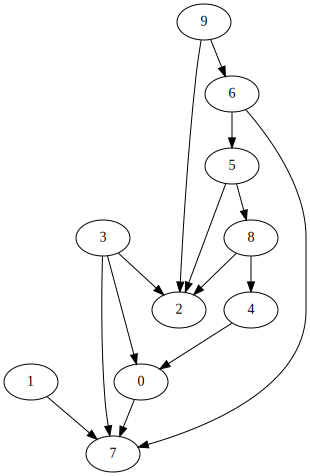

In [8]:
show_dag(dag)

In [9]:
# Test 1/4 MB with DAG, no constraint on MB_size 
# Test 2/4 MB with DAG, constraint on MB_size
# Test 3/4 MB without DAG, no constraint on MB_size
# Test 4/4 MB without DAG, constraint on MB_size

In [10]:
#Test 1

In [11]:
d2c = D2C(dags, observations)

In [12]:
mbs = []
for i in range(observations[chosen].shape[1]):
    print('MB for node', i, end=': ')
    result = d2c.compute_markov_blanket(chosen, observation,i, MB_size=10)
    mbs.append(result)
    print(result)


MB for node 0: [1, 3, 4, 6, 7]
MB for node 1: [0, 3, 6, 7]
MB for node 2: [8, 9, 3, 5]
MB for node 3: [0, 1, 2, 4, 5, 6, 7, 8, 9]
MB for node 4: [8, 0, 3]
MB for node 5: [2, 3, 6, 8, 9]
MB for node 6: [0, 1, 3, 5, 7, 9]
MB for node 7: [0, 1, 3, 6]
MB for node 8: [2, 3, 4, 5, 9]
MB for node 9: [2, 3, 5, 6, 8]


In [13]:
# Test 2

In [14]:
mbs = []
for i in range(observations[chosen].shape[1]):
    print('MB for node', i, end=': ')
    result = d2c.compute_markov_blanket(chosen, observation,i, MB_size=3)
    mbs.append(result)
    print(result)


MB for node 0: [1, 4, 7]
MB for node 1: [3, 6, 7]
MB for node 2: [8, 5, 3]
MB for node 3: [4, 5, 9]
MB for node 4: [8, 0, 3]
MB for node 5: [2, 8, 3]
MB for node 6: [3, 5, 1]
MB for node 7: [3, 6, 0]
MB for node 8: [4, 3, 9]
MB for node 9: [6, 3, 5]


In [15]:
#Test 3


In [16]:
d2c = D2C(None, observations)

In [17]:
mbs = []
for i in range(observations[chosen].shape[1]):
    # print('MB for node', i, end=': ')
    result = d2c.compute_markov_blanket(chosen, observation,i, MB_size=3)
    mbs.append(result)
    print(result)


[7, 4, 8]
[7, 3, 2]
[5, 6, 9]
[2, 7, 1]
[8, 0, 5]
[6, 2, 9]
[5, 9, 2]
[0, 1, 6]
[4, 5, 9]
[6, 2, 5]


In [18]:
mbs

[[7, 4, 8],
 [7, 3, 2],
 [5, 6, 9],
 [2, 7, 1],
 [8, 0, 5],
 [6, 2, 9],
 [5, 9, 2],
 [0, 1, 6],
 [4, 5, 9],
 [6, 2, 5]]